In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

In [108]:
def savePickle(var, name):
    with open(name+'.pickle', 'wb') as handle:
        pickle.dump(var, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def openPickle(name):
    filename = name+'.pickle'
    with open(filename,'rb') as f:
        var = pickle.load(f)
    return var

In [58]:
df = pd.read_csv('Data/Lichess vs USCF vs FIDE.csv')

In [59]:
# df.columns = df.iloc[0, :]
# df = df.iloc[1:, :]
df

,LICHESS BLITZ,LICHESS BULLET,LICHESS RAPID,LICHESS CLASSICAL,USCF,FIDE
0,845,810,985,1065,285,0
1,920,885,1125,1120,285,0
2,1000,940,1185,1255,300,0
3,1090,1010,1285,1355,575,0
4,1195,1060,1380,1445,700,0
5,1275,1135,1480,1530,835,0
6,1365,1235,1550,1590,1010,0
7,1420,1295,1600,1620,1070,0
8,1480,1335,1625,1660,1115,0
9,1530,1400,1670,1705,1155,0


In [121]:
def fitLR(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    
    slope = (model.coef_).item()
    intercept = model.intercept_.item()
    
    return np.array([slope, intercept])

def fitCR(x, y, N):
    xcube = np.vander(x, N + 1)
    x_data = xcube[:, :-1]

    model = LinearRegression()
    model.fit(x_data, y.reshape(-1, 1))

    parameters = model.coef_.squeeze()
    intercept = model.intercept_.item()
    return np.concatenate([parameters, [intercept]])

In [99]:
lichess = np.sum(df.iloc[:, :4], axis = 1)
lengths = np.sum(df.iloc[:, :4] != 0, axis = 1)

lichess = np.array(lichess / lengths)
fide = np.array(df['FIDE'])
uscf = np.array(df['USCF'])

In [122]:
parameters_LR_all = dict();
parameters_CR_all = dict();
parameters_PR_all = dict();

data_all = dict()

In [123]:
# 1. Lichess - USCF
key = 'Lichess-USCF'
idx = uscf != 0
x = lichess[idx]
y = uscf[idx]

parameters_LR = fitLR(x, y)
parameters_CR = fitCR(x, y, N = 3)
parameters_PR = fitCR(x, y, N = 5)

parameters_LR_all[key] = parameters_LR
parameters_CR_all[key] = parameters_CR
parameters_PR_all[key] = parameters_PR
data_all[key] = [x, y]

In [124]:
# 2. Lichess - FIDE
key = 'Lichess-FIDE'
idx = fide != 0
x = lichess[idx]
y = fide[idx]

parameters_LR = fitLR(x, y)
parameters_CR = fitCR(x, y, N = 3)
parameters_PR = fitCR(x, y, N = 5)

parameters_LR_all[key] = parameters_LR
parameters_CR_all[key] = parameters_CR
parameters_PR_all[key] = parameters_PR
data_all[key] = [x, y]

In [125]:
# 3. USCF - FIDE
key = 'USCF-FIDE'
idx = fide != 0
x = uscf[idx]
y = fide[idx]

parameters_LR = fitLR(x, y)
parameters_CR = fitCR(x, y, N = 3)
parameters_PR = fitCR(x, y, N = 5)


parameters_LR_all[key] = parameters_LR
parameters_CR_all[key] = parameters_CR
parameters_PR_all[key] = parameters_PR
data_all[key] = [x, y]

In [126]:
savePickle(parameters_LR_all, 'LR Parameters')
savePickle(parameters_CR_all, 'CR Parameters')
savePickle(parameters_PR_all, 'PR Parameters')
savePickle(data_all, 'Rating Data Pairs')

In [106]:
parameters = parameters_CR_all['Lichess-USCF']
parameters_LR = parameters_LR_all['Lichess-USCF']

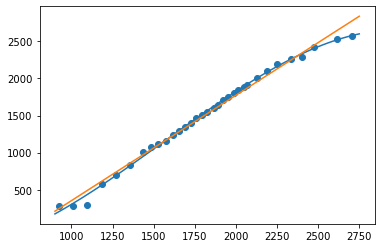

In [107]:
xplot = np.linspace(900, 2750, 100)
xplotcube = np.vander(xplot, 4)
yplot = xplotcube @ parameters.reshape(-1, 1)
ylr = xplot * parameters_LR[0] + parameters_LR[1]
plt.scatter(x, y)
plt.plot(xplot, yplot)
plt.plot(xplot, ylr)

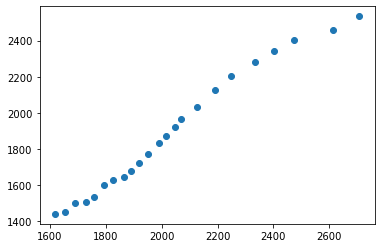

In [65]:
idx = fide != 0
plt.scatter(lichess[idx], fide[idx])

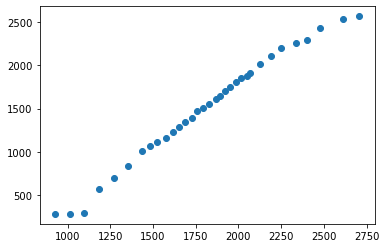

In [66]:
idx = uscf != 0
plt.scatter(lichess[idx], uscf[idx])

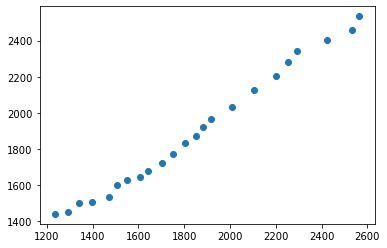

In [67]:
idx = fide != 0
plt.scatter(uscf[idx], fide[idx])

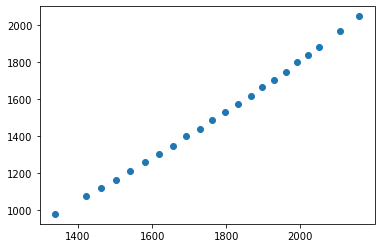

In [30]:
plt.scatter(x, y)

In [38]:
x_cube

array([[2.39266211e+09, 1.78890625e+06, 1.33750000e+03],
       [2.87843764e+09, 2.02350625e+06, 1.42250000e+03],
       [3.12013635e+09, 2.13525156e+06, 1.46125000e+03],
       [3.38344453e+09, 2.25375156e+06, 1.50125000e+03],
       [3.66116472e+09, 2.37545156e+06, 1.54125000e+03],
       [3.94431200e+09, 2.49640000e+06, 1.58000000e+03],
       [4.23187536e+09, 2.61630625e+06, 1.61750000e+03],
       [4.54336548e+09, 2.74316406e+06, 1.65625000e+03],
       [4.83752730e+09, 2.86032656e+06, 1.69125000e+03],
       [5.16650173e+09, 2.98857656e+06, 1.72875000e+03],
       [5.47504102e+09, 3.10640625e+06, 1.76250000e+03],
       [5.80773373e+09, 3.23100625e+06, 1.79750000e+03],
       [6.14105396e+09, 3.35347656e+06, 1.83125000e+03],
       [6.49994171e+09, 3.48288906e+06, 1.86625000e+03],
       [6.83196061e+09, 3.60050625e+06, 1.89750000e+03],
       [7.17509767e+09, 3.72007656e+06, 1.92875000e+03],
       [7.54395119e+09, 3.84650156e+06, 1.96125000e+03],
       [7.89545871e+09, 3.96507

In [39]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y.reshape(-1, 1))

model_cube = LinearRegression()
model_cube.fit(x_cube, y.reshape(-1, 1))

LinearRegression()

In [40]:
x_min = np.min(x); x_max = np.max(x)
print(model.coef_.item(), model.intercept_.item())

print(model_cube.coef_, model_cube.intercept_.item())

1.2980443665310275 -787.0583521029141
[[ 1.75324545e-07 -6.33313410e-04  1.88311655e+00]] -826.0749710521679


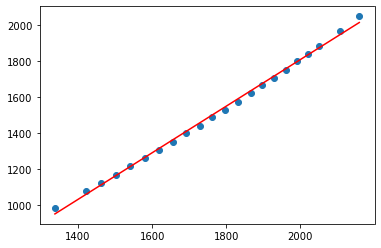

In [41]:
a_1 = model.coef_.item(); a_0 = model.intercept_.item()

x_plot = np.linspace(x_min, x_max, 200)
y_plot = x_plot * a_1 + a_0
plt.plot(x_plot, y_plot, 'r')
plt.scatter(x, y)

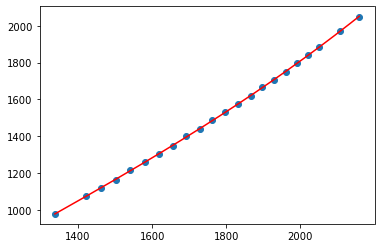

In [45]:
x_plot = np.linspace(x_min, x_max, 200)
x_cube_plot = np.vander(x_plot, 4)[:, :3]
y_plot = np.sum(x_cube_plot * model_cube.coef_, axis = 1).reshape(-1) + model_cube.intercept_.item()
plt.plot(x_plot, y_plot, 'r')
plt.scatter(x, y)